In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

In [2]:
ls data/

gaussian_m0s5_categorical_alpha0.0/ test.txt
output.xlsx                         wine.csv


In [3]:
wine_df = pd.read_csv('data/wine.csv')
#dropping catagorical features, quality and type
wine_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,2
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,2
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,2
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [4]:
df = pd.concat([wine_df,pd.get_dummies(wine_df.quality,prefix='quality'),pd.get_dummies(wine_df.wine_type,prefix='wine_type')],axis=1)

In [5]:
df = df.drop(['quality','wine_type'],axis=1)

In [ ]:
wine_df.wine_type.value_counts()

In [ ]:
wine_df.quality.value_counts()

In [ ]:
dfshape = df.shape

In [ ]:
df.iloc[0,4]

Need to figure out some random locs to sub sample, we can do this based on a percentage of rows/colums or total points

In [6]:
def random_loc(data_frame_shape):
    col = np.random.randint(0,data_frame_shape[1])
    row = np.random.randint(0,data_frame_shape[0])
    return row,col

In [ ]:
random_loc(dfshape)

In [ ]:
random_loc(dfshape)[0]

In [ ]:
df.iloc[random_loc(dfshape)[0],random_loc(dfshape)[1]]

In [7]:
def induce_missingness(dataframe,percent):
    np.random.seed(999)
    num2nan = int(dataframe.shape[0]*dataframe.shape[1]*percent)
    
    dfout = dataframe.copy()
    
    for _ in range(num2nan): 
        
        randloc = random_loc(dataframe.shape)
        
        while dfout.iloc[randloc[0],randloc[1]] == np.nan:
            randloc = random_loc(dataframe.shape)
            
        dfout.iloc[randloc[0],randloc[1]] = np.nan
        
        
    
    return dfout 
    

In [ ]:
df.shape

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaler.fit(df.to_numpy())
df_scaled = pd.DataFrame(data=scaler.transform(df.to_numpy()),columns=df.columns)

In [13]:
df_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,wine_type_1,wine_type_2
0,0.264463,0.126667,0.216395,0.308282,0.059801,0.152778,0.377880,0.267682,0.217054,0.129213,0.115942,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.206612,0.146667,0.204340,0.015337,0.066445,0.045139,0.290323,0.132781,0.449612,0.151685,0.217391,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.355372,0.133333,0.240506,0.096626,0.068106,0.100694,0.209677,0.153980,0.418605,0.123596,0.304348,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.280992,0.100000,0.192285,0.121166,0.081395,0.159722,0.414747,0.163615,0.364341,0.101124,0.275362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.280992,0.100000,0.192285,0.121166,0.081395,0.159722,0.414747,0.163615,0.364341,0.101124,0.275362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.346667,0.047619,0.021472,0.134551,0.107639,0.087558,0.150125,0.565891,0.202247,0.362319,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6493,0.173554,0.313333,0.059675,0.024540,0.088040,0.131944,0.103687,0.154365,0.620155,0.303371,0.463768,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6494,0.206612,0.286667,0.077758,0.026074,0.111296,0.097222,0.078341,0.166313,0.542636,0.297753,0.434783,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6495,0.173554,0.376667,0.071730,0.021472,0.109635,0.107639,0.087558,0.161110,0.658915,0.275281,0.318841,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [241]:
col_type = pd.DataFrame(data=np.array([np.nan]*20).reshape(1,20),columns=df.columns)
for col in df.columns:
    #print(col,len(df_scaled[col].unique()))
    
    if len(df_scaled[col].unique()) < 3:
        col_type[col] = 'cat'
    else:
        col_type[col] = 'num'
col_type.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,wine_type_1,wine_type_2
0,num,num,num,num,num,num,num,num,num,num,num,cat,cat,cat,cat,cat,cat,cat,cat,cat


In [15]:
from Models.simple_VAE import VAE
import argparse
import torch
import torch.utils.data 
from torch.utils.data import DataLoader
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [16]:
def RMSE(darray,recon):
    return np.sqrt(np.mean(np.square(darray - recon)))

In [29]:
x = None

In [31]:
x = type(x)

In [35]:
print(x)

<class 'NoneType'>


In [45]:
def train_model(data_array,model_in,
                optimizer_in,device_in,epochs=50,batch_size=125,mask_on=1,mask_in=None):
    
    dtensor = torch.FloatTensor(data_array)
    
    data_iter = DataLoader(dtensor,batch_size=batch_size, shuffle=False)
    if mask_on == 0:
        mask_iter = DataLoader(torch.zeros_like(dtensor),batch_size=batch_size, shuffle=False)
    elif mask_on==1: 
        mask_iter = DataLoader(torch.FloatTensor(mask_in),batch_size=batch_size, shuffle=False)
        
    
    
    
    
    model_in.train()
    
    
    

    loss_store = []

    for epoch in range(epochs): 
        for idx, (batch,mask) in enumerate(zip(data_iter,mask_iter)):
        
        
            batch_in = batch.float()
            optimizer_in.zero_grad()
        
            drecon,mu,log_var =  model_in.forward(batch_in)
            
            loss = model_in.loss((1-mask)*drecon, (1-mask)*batch_in)
            loss.backward()
            optimizer_in.step()


        loss_store.append(loss.item())
        
        if epoch %10 == 0:
            
            print('Epoch: '+str(epoch),'Loss: '+str(loss.detach().item()))

    
    plt.plot(loss_store)
    plt.show()

    model_in.eval()
    drecon,mu,log_var =  model_in(dtensor)
    recon_array = drecon.detach().numpy()
    input_array = dtensor.detach().numpy()#dtensor.detach().numpy()

    return RMSE(input_array,recon_array),model_in

In [ ]:
test_recon,mu_test,log_var = model(torch.FloatTensor(test))
z = model.reparam(mu_test,log_var).detach().numpy()

In [ ]:

z_embedded = TSNE(n_components=2).fit_transform(z)
#>>> X_embedded.shape
#print(z_embedded)

In [ ]:
colours = wine_df['quality'].iloc[:100].to_numpy()
bounds = list(set(wine_df['quality'].iloc[:100].to_numpy()))
sc = plt.scatter(z_embedded[:,0],z_embedded[:,1],c=colours, cmap='tab10')
plt.colorbar(sc, ticks=bounds)
plt.show()

In [116]:
def plot_latent_space(data_in,model_in,labels):
    """"""
    test_recon3,mu_out,log_out = model_in(torch.FloatTensor(data_in))
    zout = model_in.reparam(mu_out,log_out).detach().numpy()
    
    z_emb  = TSNE(n_components=2).fit_transform(zout)
    
    colours = labels
    bounds = list(set(labels))
    sc = plt.scatter(z_emb[:,0],z_emb[:,1],c=colours, cmap='bwr')
    plt.colorbar(sc, ticks=bounds)
    plt.show()

In [ ]:
plot_latent_space(test,model,wine_df['quality'].iloc[:100])

In [ ]:
plot_latent_space(darray[100:,:],model,wine_df['wine_type'].iloc[100:]) 

In [ ]:
df_shuffle = df_scaled.sample(frac=1,random_state=10)
df_test    = df_shuffle.iloc[:,:].reset_index(drop=True)
df_train   = df_shuffle.iloc[:-1200,:].reset_index(drop=True)
#roughly 20% train test split

In [ ]:
df_test.head(5)

In [ ]:
torch.manual_seed(999)

In [ ]:
df_test_with_nans = induce_missingness(df_test,0.2)

In [ ]:
df_test_with_nans.head(5)

In [ ]:
dout = induce_missingness(df,0.01)

In [21]:
from sklearn.impute import MissingIndicator


In [ ]:
indicator = MissingIndicator()
indicator.fit(df_test_with_nans)

In [ ]:
nan_mask = indicator.transform(df_test_with_nans)

In [ ]:
nan_mask_df = pd.DataFrame(data=nan_mask,columns=df_test.columns)
nan_mask_df.head(5)

In [ ]:
M = len(df_test_with_nans.index)
N = len(df_test_with_nans.columns)
ran = pd.DataFrame(np.random.uniform(size=(M,N)), columns=df_test_with_nans.columns, index=df_test_with_nans.index)

In [ ]:
df_test_nans_filled = df_test_with_nans.copy()
df_test_nans_filled[df_test_with_nans.isnull()==True] = ran
(df_test_nans_filled*nan_mask_df).head(5)

In [ ]:
dtensor = torch.FloatTensor(df_test.to_numpy())
device = torch.device("cpu")
model = VAE(num_feats = 20,latent_dims=10).to(device)
print(model)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

rmse,model_out = train_model(data_array=dtensor,model_in=model,
                optimizer_in=optimizer,device_in=device,epochs=100,batch_size=50,mask_in=nan_mask)

In [18]:
from torch.nn import BCELoss

In [86]:
def vae_imputation(model_in,df_true,df_missing,mask_df,feature_type,number_iters):
    df_out = df_missing.copy()
    rmse_out = []
    loss_out = []
    mask_tensor = torch.FloatTensor(mask_df.to_numpy())
    loss = BCELoss()
    
    rmse_out.append(RMSE(mask_df.to_numpy()*df_true.to_numpy(),mask_df.to_numpy()*df_out.to_numpy()))
    
    for i in range(number_iters): 
        model_in.eval()
        recon,_,_ = model_in.forward(torch.FloatTensor(df_out.to_numpy()))
        recon_df  = pd.DataFrame(data=recon.detach().numpy(),columns=mask_df.columns)
        df_out[mask_df==True] = recon_df
        
        for col in feature_type.columns:
            
            if feature_type[col].values == 'cat':
                
                df_out[col]   = df_out[col].round()
                recon_df[col] = recon_df[col].round()
                
        
        loss_out.append(loss((1-mask_tensor)*torch.FloatTensor(df_true.to_numpy()),
                (1-mask_tensor)*torch.FloatTensor(recon_df.to_numpy())).item())
        
        rmse_out.append(RMSE(mask_df.to_numpy()*df_true.to_numpy(),mask_df.to_numpy()*recon_df.to_numpy()))
    return df_out,rmse_out,loss_out

In [ ]:
out,rmse,loss_out =vae_imputation(model_in=model_out,
               df_true=df_test,df_missing=df_test_nans_filled,
                         mask_df=nan_mask_df,feature_type=col_type)

In [ ]:
model_out

In [ ]:
plt.plot(rmse)
plt.title('Imputed Value RMSE')
plt.show()

In [ ]:
plt.plot(loss_out)
plt.title('BCELoss of non-missing reconstruction')
plt.show()

In [95]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(df_test_with_nans.to_numpy())
knn_imputed = imputer.transform(df_test_with_nans.to_numpy())

In [ ]:
RMSE(df_test.to_numpy(),knn_imputed)

In [ ]:
RMSE(df_test.to_numpy(),out.to_numpy())

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(df_test.to_numpy(),knn_imputed)

In [ ]:
mean_absolute_error(df_test.to_numpy(),out.to_numpy())

In [269]:
def run_imputation_experiments(df_input,missing_test):
    RMSE_DF = pd.DataFrame(data=None)
    
    for ii in range(len(missing_test)):
        
        
        
        df_shuffle = df_input.sample(frac=1,random_state=10).copy()
        df_test    = df_shuffle.iloc[:,:].reset_index(drop=True)
        df_test_with_nans = induce_missingness(df_test,missing_test[ii])
        indicator = MissingIndicator()
        indicator.fit(df_test_with_nans)
        nan_mask = indicator.transform(df_test_with_nans)
        nan_mask_df = pd.DataFrame(data=nan_mask,columns=df_test.columns)
        M = len(df_test_with_nans.index)
        N = len(df_test_with_nans.columns)
        
        
        ran = pd.DataFrame(np.random.uniform(size=(M,N)), columns=df_test_with_nans.columns, index=df_test_with_nans.index)
        
        
        

        df_test_nans_filled = df_test_with_nans.copy()
        df_test_nans_filled[df_test_with_nans.isnull()==True] = ran



        dtensor = torch.FloatTensor(df_test.to_numpy())
        device = torch.device("cpu")
        model = model = BETA_VAE(20,10,[300,200,100],beta=5)
        optimizer = optim.Adam(model.parameters(), lr=1e-3)

        rmse,model_out = train_model(data_array=dtensor,model_in=model,
                    optimizer_in=optimizer,device_in=device,epochs=100,batch_size=50,mask_on=1,mask_in=nan_mask)

        out,rmse,loss_out =vae_imputation(model_in=model_out,df_true=df_test,df_missing=df_test_nans_filled,
                             mask_df=nan_mask_df,feature_type=col_type,number_iters=50)
        
        RMSE_DF['test_' + str(missing_test[ii])] = rmse
        
    return RMSE_DF,loss_out
    

Epoch: 0 Loss: 247.61883544921875
Epoch: 10 Loss: 216.641357421875
Epoch: 20 Loss: 216.6434326171875
Epoch: 30 Loss: 215.8978271484375
Epoch: 40 Loss: 215.9683074951172
Epoch: 50 Loss: 215.82186889648438
Epoch: 60 Loss: 215.81333923339844
Epoch: 70 Loss: 215.74404907226562
Epoch: 80 Loss: 215.92311096191406
Epoch: 90 Loss: 215.86370849609375


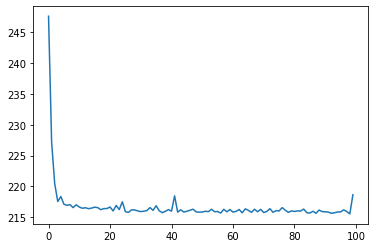

In [270]:
df_eval,loss = run_imputation_experiments(df_input=df_scaled,missing_test=[0.5])

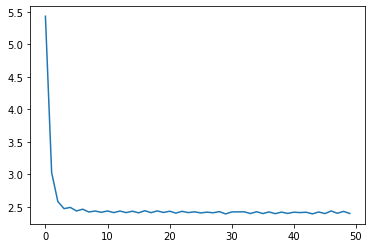

In [252]:
plt.plot(loss)

In [98]:
df_eval

,test_0.05,test_0.1,test_0.3,test_0.5,test_0.6,test_0.8
0,0.020305,0.037268,0.091774,0.156780,0.180288,0.209269
1,0.024304,0.043452,0.103771,0.180260,0.196785,0.239562
2,0.024315,0.043136,0.102296,0.176997,0.193048,0.234871
3,0.024550,0.043205,0.102247,0.175991,0.192278,0.233798
4,0.024272,0.042883,0.102389,0.175627,0.192366,0.233659
5,0.024422,0.042986,0.102219,0.175211,0.192336,0.233020
6,0.024423,0.042995,0.102143,0.175297,0.192091,0.233154
7,0.024585,0.043165,0.102105,0.175080,0.192060,0.232980
8,0.024435,0.043068,0.102238,0.175169,0.192129,0.233291
9,0.024469,0.043071,0.102091,0.175114,0.192094,0.233029


In [141]:
def exp_recon(model_in,data_in,number_of_samples=1000):
    recon_out = torch.zeros_like(data_in)
    
    for _ in range(number_of_samples):
        recon,_,_ = model_out.forward(dtensor)
        
        recon_out += recon
        
    recon_out = recon_out/number_of_samples
    
    return recon_out
        

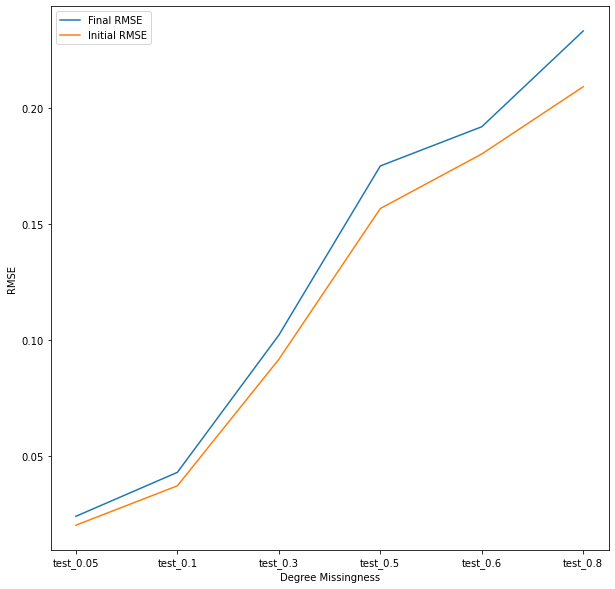

In [99]:
import seaborn as sns
plt.figure(figsize=(10,10))
plot = sns.lineplot(data=df_eval.iloc[-1,:])
plot = sns.lineplot(data=df_eval.iloc[0,:])
plt.legend(['Final RMSE','Initial RMSE'])
plt.xlabel('Degree Missingness')
plt.ylabel('RMSE')
plt.show()

OUTLIER DETECTION

/

/

/

In [ ]:
import seaborn as sns

In [ ]:
for col in df_test.columns:
    
    if col_type[col].item() == 'num':
        
        col_sigma = np.std(df_test[col])
        print(np.random.normal(0, 5*col_sigma))
    
    #df_test[col].plot.hist(bins=50)
    #plt.show()

In [101]:
len(wine_df['quality'].unique())


7

In [ ]:
probs_list = wine_df['quality'].astype('category').value_counts()/wine_df['quality'].astype('category').value_counts().sum()
tempered_probs_list = probs_list**0.5/np.sum(probs_list**0.5)
print(tempered_probs_list)
print(probs_list)

In [ ]:
cats = list(probs_list.index.values)
np.random.choice(cats,p=probs)

In [ ]:
wine_df


In [105]:
col_type = pd.DataFrame(data=np.array([np.nan]*13).reshape(1,13),columns=wine_df.columns)
for col in wine_df.columns:
    #print(col,len(df_scaled[col].unique()))
    
    if len(wine_df[col].unique()) < 10:
        col_type[col] = 'cat'
    else:
        col_type[col] = 'num'
col_type.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,num,num,num,num,num,num,num,num,num,num,num,cat,cat


In [ ]:
for col in wine_df.columns:
    
    if col_type[col].item() == 'num':
        
        col_sigma = np.std(df_test[col])
        print(np.random.normal(0, 5*col_sigma))
        
    if col_type[col].item() == 'cat': 
        probs_list = wine_df[col].astype('category').value_counts()/wine_df[col].astype('category').value_counts().sum()
        tempered_probs_list = probs_list**0.5/np.sum(probs_list**0.5)
        cats  = list(probs_list.index.values)
        probs = tempered_probs_list.values
        print(np.random.choice(cats,p=probs))
    

In [117]:
#Corrupt Rows
def corrupt_rows(input_df,coltype_df,percent,num_sigma,alpha): 
    per_corrupt = percent
    num = int(input_df.shape[0]*per_corrupt)
    print('Corrupting ' + str(num) + ' rows')
    crs = np.random.randint(0,input_df.shape[0],size=num)
    
    df_out = input_df.copy()
    
    for row in crs:
    
        for ind,col in enumerate(input_df.columns):
            
            if coltype_df[col].item() == 'num':

                col_sigma = np.std(input_df[col])
                df_out.iloc[row,ind] += np.random.normal(0, num_sigma*col_sigma)

            if coltype_df[col].item() == 'cat': 
                probs_list = input_df[col].astype('category').value_counts()/input_df[col].astype('category').value_counts().sum()
                tempered_probs_list = probs_list**alpha/np.sum(probs_list**alpha)
                cats  = list(probs_list.index.values)
                probs = tempered_probs_list.values
                df_out.iloc[row,ind] = np.random.choice(cats,p=probs)
                
    
#         print('Input')  
#         print()
#         print(input_df.iloc[row,:])
#         print()
#         print()
#         print('Corrupted')
#         print()
#         print(df_out.iloc[row,:])
#         print('~~~~~~~~~~~~~~~~~~~')
#         print()
#         print()
    return df_out,crs

In [118]:
corrupt_dataframe,row_inds = corrupt_rows(input_df=wine_df,coltype_df=col_type,percent=0.1,num_sigma=5,alpha=0)

Corrupting 649 rows


In [119]:
wine_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,2
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,2
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,2
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [120]:
df = corrupt_dataframe.copy()

In [121]:
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


In [122]:
df = pd.concat([df,pd.get_dummies(df.quality,prefix='quality'),pd.get_dummies(df.wine_type,prefix='wine_type')],axis=1)

In [123]:
df = df.drop(['quality','wine_type'],axis=1)

In [124]:
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,wine_type_1,wine_type_2
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,0,0,1,0,0,0,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,0,0,1,0,0,0,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,0,0,1,0,0,0,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,0,0,1,0,0,0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,0,0,1,0,0,0,0,1


In [125]:
scaler = MinMaxScaler()
scaler.fit(df.to_numpy())
df_scaled = pd.DataFrame(data=scaler.transform(df.to_numpy()),columns=df.columns)

In [127]:
df_scaled.iloc[row_inds,:].head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,wine_type_1,wine_type_2
2485,0.555326,0.484347,0.543109,0.522416,0.270641,0.441234,0.581026,0.555765,0.590087,0.403310,0.521013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1826,0.332563,0.440889,0.486747,0.222139,0.390896,0.437065,0.417360,0.619503,0.720862,0.280105,0.640997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1164,0.450930,0.525645,0.613112,0.549627,0.145368,0.344725,0.449832,0.343977,0.301248,0.549659,0.773736,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6475,0.680216,0.530688,0.494935,0.310140,0.453771,0.276731,0.422220,0.542427,0.555547,0.617343,0.684363,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4298,0.586928,0.554895,0.459879,0.438453,0.222738,0.306057,0.618706,0.402446,0.787058,0.486959,0.256925,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [128]:
outlier_labels = [0 if i not in row_inds else 1 for i in range(df_scaled.shape[0])]

Epoch: 0 Loss: 648.1258544921875
Epoch: 10 Loss: 564.14697265625
Epoch: 20 Loss: 563.5464477539062
Epoch: 30 Loss: 560.8976440429688
Epoch: 40 Loss: 549.703369140625
Epoch: 50 Loss: 545.476806640625
Epoch: 60 Loss: 541.16845703125
Epoch: 70 Loss: 528.1663208007812
Epoch: 80 Loss: 510.8116455078125
Epoch: 90 Loss: 488.9502258300781
Epoch: 100 Loss: 460.18121337890625
Epoch: 110 Loss: 441.5430908203125
Epoch: 120 Loss: 433.49505615234375
Epoch: 130 Loss: 429.6227111816406
Epoch: 140 Loss: 423.9540100097656
Epoch: 150 Loss: 413.16302490234375
Epoch: 160 Loss: 402.1123352050781
Epoch: 170 Loss: 391.8896789550781
Epoch: 180 Loss: 383.2845458984375
Epoch: 190 Loss: 377.1554260253906
Epoch: 200 Loss: 372.5715637207031
Epoch: 210 Loss: 369.7945556640625
Epoch: 220 Loss: 367.3096618652344
Epoch: 230 Loss: 365.2148132324219
Epoch: 240 Loss: 364.13543701171875
Epoch: 250 Loss: 363.31304931640625
Epoch: 260 Loss: 362.9647216796875
Epoch: 270 Loss: 362.349853515625
Epoch: 280 Loss: 362.036590576171

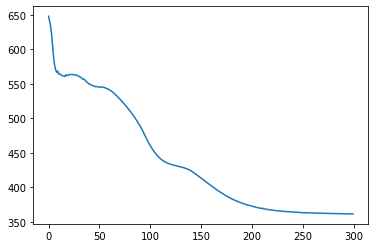

In [129]:
dtensor = torch.FloatTensor(df_scaled.to_numpy())
device = torch.device("cpu")
model = VAE(num_feats = 20,latent_dims=2).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-4)

rmse,model_out = train_model(data_array=dtensor,model_in=model,
                optimizer_in=optimizer,device_in=device,epochs=300,batch_size=50,mask_on=0,mask_in=None)

In [ ]:
model_out

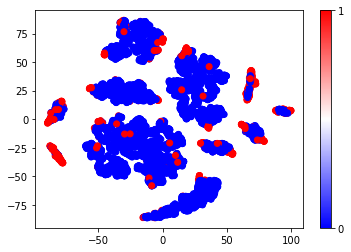

In [130]:
plot_latent_space(df_scaled.to_numpy(),model_out,outlier_labels)

In [131]:
from Models.bVAE import BETA_VAE

In [135]:
model = BETA_VAE(20,3,[100],beta=100)

Epoch: 0 Loss: 609.0017700195312
Epoch: 10 Loss: 516.645263671875
Epoch: 20 Loss: 425.8736877441406
Epoch: 30 Loss: 399.9137878417969
Epoch: 40 Loss: 392.2549743652344
Epoch: 50 Loss: 388.481201171875
Epoch: 60 Loss: 382.5762023925781
Epoch: 70 Loss: 382.61041259765625
Epoch: 80 Loss: 383.09515380859375
Epoch: 90 Loss: 379.4075622558594


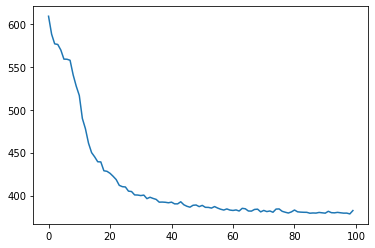

In [136]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)
rmse,model_out = train_model(data_array=dtensor,model_in=model,
                optimizer_in=optimizer,device_in=device,epochs=100,batch_size=50,mask_on=0,mask_in=None)

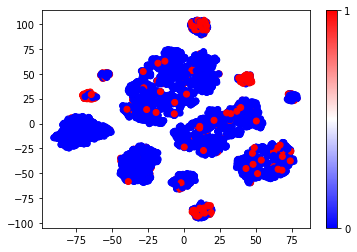

In [137]:
plot_latent_space(df_scaled.to_numpy(),model_out,outlier_labels)

In [142]:
exp_recon(model_out,dtensor,100)

tensor([[5.0325e-01, 5.1436e-01, 4.5788e-01,  ..., 1.9228e-03, 1.9545e-03,
         9.9813e-01],
        [5.0448e-01, 5.1696e-01, 4.5741e-01,  ..., 1.4104e-03, 1.7230e-03,
         9.9848e-01],
        [5.0302e-01, 5.1384e-01, 4.5718e-01,  ..., 1.8089e-03, 1.5400e-04,
         9.9987e-01],
        ...,
        [5.0846e-01, 5.1095e-01, 4.5974e-01,  ..., 1.4895e-03, 7.0052e-03,
         9.9297e-01],
        [5.3710e-01, 5.4918e-01, 4.4710e-01,  ..., 1.9617e-03, 9.9513e-01,
         5.0706e-03],
        [5.4292e-01, 5.3418e-01, 4.4599e-01,  ..., 2.9708e-03, 9.9429e-01,
         5.0887e-03]], grad_fn=<DivBackward0>)

In [139]:
recon,_,_ = model_out.forward(dtensor)

In [ ]:
recon

In [145]:
recon_out = scaler.inverse_transform(exp_recon(model_out,dtensor,100).detach().numpy())

In [146]:
recon_df = pd.DataFrame(data=recon_out,columns=df.columns)
recon_df.iloc[:,-9:] = round(recon_df.iloc[:,-9:])

In [148]:
recon_df.iloc[row_inds,:]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,wine_type_1,wine_type_2
2485,7.622427,0.548785,0.274366,3.559613,0.080494,12.852910,77.243759,0.996641,3.399401,0.678923,10.559462,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1826,8.430216,0.610975,0.229619,1.722319,0.094397,14.541172,39.774971,0.997122,3.327965,0.646802,10.162631,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1164,7.317794,0.343138,0.270930,5.964800,0.037503,35.965614,125.159409,0.993534,3.240333,0.468025,11.117403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6475,8.538174,0.437966,0.304463,1.622142,0.082295,14.873718,26.831518,0.996273,3.310293,0.695911,11.459662,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4298,8.065176,0.399655,0.271631,5.212937,0.061403,17.598492,61.192219,0.996437,3.280123,0.673477,11.164484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,8.456473,0.614408,0.234341,1.970777,0.094745,14.542418,40.645126,0.997204,3.330155,0.642281,10.123959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5561,7.110893,0.418490,0.346499,4.737559,0.068633,23.894865,78.201492,0.992848,3.196656,0.529269,11.519633,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3592,7.298294,0.325660,0.280203,5.919956,0.034870,36.289776,126.860855,0.993399,3.231261,0.467492,11.178852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2534,8.455426,0.609115,0.235429,1.727208,0.095434,15.956255,37.546242,0.997304,3.324530,0.642435,10.133170,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [149]:
corrupt_dataframe.iloc[row_inds,:]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
2485,9.131594,0.243879,0.833650,16.231884,-0.116118,-2.745362,242.874679,1.001029,3.709492,0.082721,11.056883,4,1
1826,0.600558,0.005201,0.487924,-32.630565,0.047288,-4.925430,-56.051739,1.006730,4.353189,-0.426411,15.665414,5,1
1164,5.133596,0.470695,1.263043,20.659816,-0.286341,-53.217642,3.256995,0.982089,2.287784,0.687491,20.763894,3,2
6475,13.914413,0.498391,0.538150,-18.310595,0.132723,-88.777775,-47.175611,0.999836,3.539483,0.967186,17.331103,7,1
4298,10.341822,0.631341,0.323115,2.569101,-0.181210,-73.440390,311.694976,0.987318,4.679018,0.428391,0.913339,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,-1.416103,-0.562961,1.982695,-3.154425,0.066774,-171.219102,284.987206,1.006104,3.799226,0.408750,14.454717,5,1
5561,22.456987,-0.276188,1.486236,20.247314,0.181201,-55.602777,496.254666,1.015085,3.977976,0.640636,10.523625,8,2
3592,-0.913887,1.371006,-0.406044,-1.256657,0.022798,59.428527,-325.999092,0.997044,2.768119,1.786014,18.082416,9,2
2534,4.065532,1.914932,0.622281,-0.471536,0.075049,-2.303853,294.765726,1.006935,3.217431,0.588353,9.727605,5,1


In [ ]:
df.iloc[row_inds,:]

In [ ]:
wine_df.iloc[row_inds,:]

In [151]:
def undummify(df, prefix_sep="_"):
    #https://stackoverflow.com/questions/50607740/reverse-a-get-dummies-encoding-in-pandas
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df


In [165]:
undummify(recon_df, prefix_sep="_").iloc[:,-2:]

,quality,wine
0,6,type_2
1,6,type_2
2,6,type_2
3,6,type_2
4,6,type_2
...,...,...
6492,5,type_1
6493,6,type_1
6494,7,type_2
6495,5,type_1


In [163]:
undummify(recon_df, prefix_sep="_").iloc[:,-1].map(lambda x: x.lstrip('type_'))


0       2
1       2
2       2
3       2
4       2
       ..
6492    1
6493    1
6494    2
6495    1
6496    1
Name: wine, Length: 6497, dtype: object

In [253]:
import torch
from torch import nn
from torch.distributions import Normal, kl_divergence
from torch.nn.functional import softplus


def tabular_encoder(input_size: int, latent_size: int):
    """
    Simple encoder for tabular data.
    If you want to feed image to a VAE make another encoder function with Conv2d instead of Linear layers.
    :param input_size: number of input variables
    :param latent_size: number of output variables i.e. the size of the latent space since it's the encoder of a VAE
    :return: The untrained encoder model
    """
    return nn.Sequential(
        nn.Linear(input_size, 500),
        nn.ReLU(),
        nn.Linear(500, 200),
        nn.ReLU(),
        nn.Linear(200, latent_size * 2)  # times 2 because this is the concatenated vector of latent mean and variance
    )


def tabular_decoder(latent_size: int, output_size: int):
    """
    Simple decoder for tabular data.
    :param latent_size: size of input latent space
    :param output_size: number of output parameters. Must have the same value of input_size
    :return: the untrained decoder
    """
    return nn.Sequential(
        nn.Linear(latent_size, 200),
        nn.ReLU(),
        nn.Linear(200, 500),
        nn.ReLU(),
        nn.Linear(500, output_size * 2)
        # times 2 because this is the concatenated vector of reconstructed mean and variance
    )


class VAEAnomaly(nn.Module):

    def __init__(self, input_size: int, latent_size: int, L=10):
        """
        :param input_size: Number of input features
        :param latent_size: Size of the latent space
        :param L: Number of samples in the latent space (See paper for more details)
        """
        super().__init__()
        self.L = L
        self.input_size = input_size
        self.latent_size = latent_size
        self.encoder = tabular_encoder(input_size, latent_size)
        self.decoder = tabular_decoder(latent_size, input_size)
        self.prior = Normal(0, 1)

    def forward(self, x):
        pred_result = self.predict(x)
        x = x.unsqueeze(0)  # unsqueeze to broadcast input across sample dimension (L)
        log_lik = Normal(pred_result['recon_mu'], pred_result['recon_sigma']).log_prob(x).mean(
            dim=0)  # average over sample dimension
        log_lik = log_lik.mean(dim=0).sum()
        kl = kl_divergence(pred_result['latent_dist'], self.prior).mean(dim=0).sum()
        loss = kl - log_lik
        return dict(loss=loss, kl=kl, recon_loss=log_lik, **pred_result)

    def predict(self, x) -> dict:
        """
        :param x: tensor of shape [batch_size, num_features]
        :return: A dictionary containing prediction i.e.
        - latent_dist = torch.distributions.Normal instance of latent space
        - latent_mu = torch.Tensor mu (mean) parameter of latent Normal distribution
        - latent_sigma = torch.Tensor sigma (std) parameter of latent Normal distribution
        - recon_mu = torch.Tensor mu (mean) parameter of reconstructed Normal distribution
        - recon_sigma = torch.Tensor sigma (std) parameter of reconstructed Normal distribution
        - z = torch.Tensor sampled latent space from latent distribution
        """
        batch_size = len(x)
        latent_mu, latent_sigma = self.encoder(x).chunk(2, dim=1) #both with size [batch_size, latent_size]
        latent_sigma = softplus(latent_sigma)
        dist = Normal(latent_mu, latent_sigma)
        z = dist.rsample([self.L])  # shape: [L, batch_size, latent_size]
        z = z.view(self.L * batch_size, self.latent_size)
        recon_mu, recon_sigma = self.decoder(z).chunk(2, dim=1)
        recon_sigma = softplus(recon_sigma)
        recon_mu = recon_mu.view(self.L, *x.shape)
        recon_sigma = recon_sigma.view(self.L, *x.shape)
        return dict(latent_dist=dist, latent_mu=latent_mu,
                    latent_sigma=latent_sigma, recon_mu=recon_mu,
                    recon_sigma=recon_sigma, z=z)

    def is_anomaly(self, x, alpha=0.05):
        """
        :param x:
        :param alpha: Anomaly threshold (see paper for more details)
        :return: Return a vector of boolean with shape [x.shape[0]]
                 which is true when an element is considered an anomaly
        """
        p = self.reconstructed_probability(x)
        return p < alpha

    def reconstructed_probability(self, x):
        with torch.no_grad():
            pred = self.predict(x)
        recon_dist = Normal(pred['recon_mu'], pred['recon_sigma'])
        x = x.unsqueeze(0)
        p = recon_dist.log_prob(x).exp().mean(dim=0).mean(dim=-1)  # vector of shape [batch_size]
        return p

    def generate(self, batch_size: int=1) -> torch.Tensor:
        """
        Sample from prior distribution, feed into decoder and get in output recostructed samples
        :param batch_size:
        :return: Generated samples
        """
        z = self.prior.sample((batch_size, self.latent_size))
        recon_mu, recon_sigma = self.decoder(z).chunk(2, dim=1)
        recon_sigma = softplus(recon_sigma)
        return recon_mu + recon_sigma * torch.rand_like(recon_sigma)

In [257]:
model2 = VAEAnomaly(400,20, 10)

In [258]:
 opt = torch.optim.Adam(model2.parameters(), 0.004)

In [259]:
data_iter = DataLoader(dtensor,batch_size=500, shuffle=True)
for _ in range(10):
    for batch in data_iter: 
        opt.zero_grad()
        pred_out = model2(dtensor)
        pred_out['loss'].backward()
        print(pred_out['loss'])
        opt.step()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (6497x20 and 400x500)

In [221]:
outliers = model.is_anomaly(dtensor,alpha=2.2).detach().numpy()

In [230]:
outlier_list = list(np.where(outliers)[0])

In [227]:
sorted(row_inds)

[6,
 22,
 38,
 41,
 48,
 89,
 116,
 130,
 131,
 135,
 144,
 145,
 163,
 166,
 177,
 179,
 184,
 192,
 195,
 217,
 223,
 224,
 226,
 230,
 248,
 251,
 268,
 287,
 295,
 296,
 309,
 326,
 330,
 335,
 339,
 343,
 351,
 375,
 390,
 391,
 402,
 419,
 420,
 426,
 436,
 439,
 449,
 451,
 456,
 462,
 462,
 473,
 474,
 480,
 482,
 483,
 497,
 509,
 538,
 538,
 543,
 553,
 560,
 567,
 592,
 626,
 633,
 642,
 668,
 675,
 680,
 691,
 709,
 716,
 737,
 739,
 746,
 749,
 768,
 769,
 789,
 791,
 817,
 829,
 846,
 865,
 869,
 935,
 945,
 951,
 952,
 959,
 965,
 968,
 975,
 986,
 991,
 994,
 1012,
 1014,
 1015,
 1020,
 1032,
 1037,
 1043,
 1057,
 1069,
 1082,
 1085,
 1088,
 1100,
 1104,
 1123,
 1123,
 1123,
 1139,
 1153,
 1161,
 1164,
 1167,
 1178,
 1179,
 1202,
 1229,
 1235,
 1240,
 1246,
 1249,
 1259,
 1262,
 1293,
 1304,
 1326,
 1342,
 1357,
 1357,
 1360,
 1360,
 1373,
 1374,
 1385,
 1403,
 1405,
 1412,
 1418,
 1424,
 1430,
 1435,
 1437,
 1449,
 1450,
 1454,
 1463,
 1469,
 1471,
 1475,
 1495,
 1499,

In [233]:
counter = 0 
for elem in sorted(row_inds):
    if elem in outlier_list:
        counter +=1
print(counter)

372


In [271]:
from sklearn.preprocessing import OneHotEncoder

In [272]:
encoder1 = OneHotEncoder()

In [275]:
encoder1.fit(np.array(sorted(row_inds)).reshape(649,1))

OneHotEncoder()

In [281]:
out = encoder1.transform(np.array(sorted(row_inds)).reshape(649,1)).toarray()

In [282]:
len(outlier_list)

493

In [286]:
row_inds

array([2485, 1826, 1164, 6475, 4298, 4022, 1944, 3968, 4081, 3710, 4398,
       5868, 5283,  339, 5556, 4862, 1782, 6480, 3449, 4061, 4251, 3092,
       2272, 3829, 3884,  145, 4297, 1463, 3408, 1104, 3561,  224, 4864,
       4135, 1666, 4942,   41, 3712, 5039, 2608, 5906,  483, 4614, 4397,
       6154, 3324, 6274, 1919, 2715, 4242, 2678, 5793, 6024, 4952, 6240,
       1374,  426, 4847, 3707,  144, 3589, 4659, 5009, 4300, 6124, 1167,
       4153, 5010, 2511, 4944, 5780, 4212,  335, 2039, 1822, 5027, 4617,
        626, 4540, 3161, 3934, 4450, 3624, 4955, 1014, 4571, 2851, 1608,
       2286,  789, 1852,  268,  251, 2502, 2943, 4872, 5834, 5102, 4446,
       2628, 6356, 4263,  326, 1713, 3505, 4624, 1548,  497, 4255, 3500,
        817, 1568, 2848, 3182, 4721, 6117, 2836, 2841, 1037, 2315,  553,
       4964, 1069,  975, 2171, 3844, 3147, 3823,   89, 5665, 3609,  474,
       5386, 4189, 1814, 6494,  768, 2992, 3338, 1454, 1123, 6046, 5846,
       1085, 2578, 2869, 1326, 6334, 2033,  419, 45

In [287]:
onehot_encoded = list()
for value in row_inds:
    letter = [0 for _ in range(6497)]
    letter[value] = 1
    onehot_encoded.append(letter)
print(onehot_encoded)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [290]:
len(onehot_encoded)

649